In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

TARGET_DIR = "./session_train_100_hiddens_rnn_adam/"

true_path = lambda item: os.path.join(TARGET_DIR, item)

In [13]:
config = None
with open(true_path('config.json')) as f:
    config = json.load(f)
    
test_loss = np.load(true_path('test_loss.npy'))[0]
epoch_losses = np.load(true_path('epoch_losses.npy'))
v_train_losses = np.load(true_path('v_interval_train_losses.npy'))
v_val_losses = np.load(true_path('v_interval_val_losses.npy'))

### Config

In [14]:
df = pd.DataFrame.from_dict(config, orient='index')
df.reset_index(level=0, inplace=True)
df

,index,0
0,model,"VanillaRNN(\n (i2h): Linear(in_features=193, ..."
1,criterion,CrossEntropyLoss()
2,optimizer,Adam (\nParameter Group 0\n amsgrad: False\...
3,path_to_save_result,./
4,session_name,session_train_100_hiddens_rnn_adam
5,n_epochs,250
6,print_every_n_epochs,5
7,validate_every_v_epochs,5
8,verbose,True
9,num_epochs_no_improvement_early_stop,6


### Test Loss

In [15]:
print('Test loss is', test_loss)

Test loss is 2.7103201241237618


### Plot Train vs Val loss

It's recorded every `v_interval`:

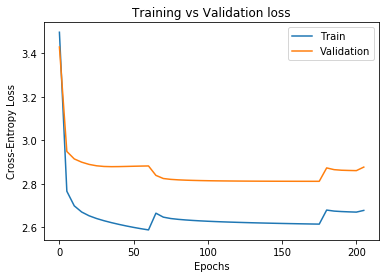

In [16]:
v_interval = config['validate_every_v_epochs']
xrange = np.arange(0, len(v_train_losses) * v_interval, v_interval)

plt.plot(xrange, v_train_losses, label='Train')
plt.plot(xrange, v_val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training vs Validation loss')
plt.legend(loc='best')
plt.show()

### Plot all epochs loss

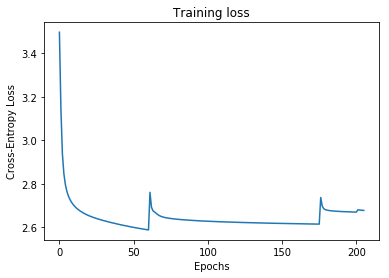

In [17]:
plt.plot(epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training loss')
plt.show()

### Compare with LSTM

In [21]:
LSTM_DIR = "./session_train_100_hiddens_adam/"

lstm_path = lambda item: os.path.join(LSTM_DIR, item)

In [22]:
lstm_train_losses = np.load(lstm_path('v_interval_train_losses.npy'))
lstm_val_losses = np.load(lstm_path('v_interval_val_losses.npy'))

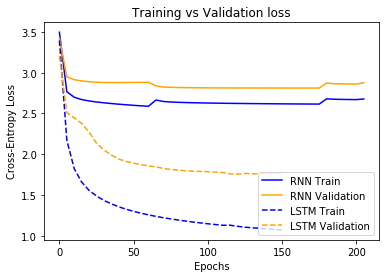

In [23]:
lstm_range = np.arange(0, len(lstm_train_losses) * 5, 5)

plt.plot(xrange, v_train_losses, label='RNN Train', color='blue')
plt.plot(xrange, v_val_losses, label='RNN Validation', color='orange')
plt.plot(lstm_range, lstm_train_losses, label='LSTM Train', color='blue', linestyle='dashed')
plt.plot(lstm_range, lstm_val_losses, label='LSTM Validation', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training vs Validation loss')
plt.legend(loc='best')
plt.show()